### Descripción  
Esta práctica permitirá explorar cómo se pueden utilizar herramientas de visualización avanzadas en Python para interpretar y presentar datos de forma efectiva, proporcionando una oportunidad valiosa para mejorar las habilidades analíticas y técnicas.

### Nivel 1  
Realiza la conexión en Python con MySQL Workbench para cargar toda la información que tienes en las tablas.  
Realizarás una visualización para cada ejercicio.   
Comenta lo que llama la atención de graficar esta variable, justifica la elección del gráfico e interpreta los resultados en función de tus datos.  

### Ejercicio 1    
Una variable numérica.



Comentarios:   
Comenzaré instalando numpy, pandas, matplot, squarify, plotly y seaborn mediante la terminal. (Los iré utilizando en los diferentes ejercicios)
Luego continuaré conectando Python con MySql Workbench para poder cargar todas las tablas con las que trabajaré.  
Para ello primero debo instalar Mysql connector module.

In [1]:
%pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import mysql.connector

connection = mysql.connector.connect(
        host='localhost',
        user='root',
        password='Mysql-1904',
        database='sprint4'
    )
   

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify 
import plotly.express as px

In [4]:
tablas_db = ['transactions','companies','credit_card','user','estado_tarj', 'products']
df = {}

for tabla in tablas_db:
    query = f'SELECT * FROM {tabla}'
    df[tabla] = pd.read_sql(query, connection)

connection.close()


print(df)

{'transactions':                                        id   card_id business_id  \
0    02C6201E-D90A-1859-B4EE-88D2986D3B02  CcU-2938      b-2362   
1    0466A42E-47CF-8D24-FD01-C0B689713128  CcU-4219      b-2302   
2    063FBA79-99EC-66FB-29F7-25726D1764A5  CcU-2987      b-2250   
3    0668296C-CDB9-A883-76BC-2E4C44F8C8AE  CcU-3743      b-2618   
4    06CD9AA5-9B42-D684-DDDD-A5E394FEBA99  CcU-2959      b-2346   
..                                    ...       ...         ...   
582  FD2E8957-414B-BEEC-E9AD-59AA7A8A6290  CcU-3232      b-2390   
583  FD89D51B-AE8D-77DC-E450-B8083FBD3187  CcU-3960      b-2494   
584  FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65  CcU-4331      b-2302   
585  FE809ED4-2DB6-55AC-C915-929516E4646B  CcU-4849      b-2302   
586  FE96CE47-BD59-381C-4E18-E3CA3D44E8FF  CcU-2945      b-2226   

              timestamp  amount  declined    product_ids  user_id       lat  \
0   2021-08-28 23:42:24  466.92         0      71, 1, 19       92  81.91850   
1   2021-07-26 07:29

C:\Users\const\AppData\Local\Temp\ipykernel_11840\364832217.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df[tabla] = pd.read_sql(query, connection)



Para resolver este ejercicio he elegido la variable amount (numérica) de la tabla transactions porque puede dar información relevante acerca de cómo es el comportamiento financiero. He elegido un histograma para representarla.
El histograma mostrará la distribución de los montos de las transacciones, lo que puede ayudar a identificar tendencias como la frecuencia de diferentes rangos de montos.

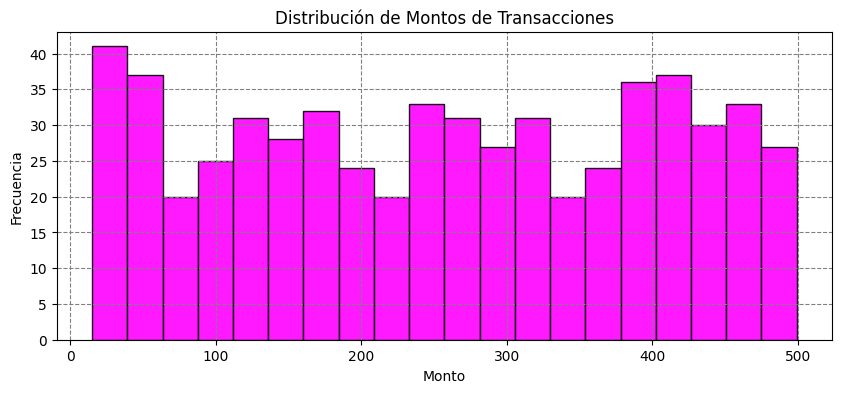

In [5]:
plt.figure(figsize=(10, 4))
plt.hist(df['transactions']['amount'], bins=20, edgecolor='k', color= "magenta", alpha=0.9)
plt.title('Distribución de Montos de Transacciones')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.grid(linestyle = "dashed", color = "grey")
plt.show()

La frecuencia de los montos de transacciones parece estar relativamente uniforme a lo largo de las diferentes categorías de monto. No hay picos extremadamente altos o bajos, lo que sugiere que los montos de las transacciones están distribuidos de manera más o menos equitativa.  
En caso de hacer una revisión más puntual, podemos ver que las que más frecuentemente se dan son las transacciones de menor monto. 

### Exercici 2: 
Dues variables numèriques.

En este caso he elegido las variables amount y timestamp de la tabla transactions. Analizar esta relación nos puede decir si hay patrones temporales en el comportamiento de las transacciones. Para ello he elegido un gráfico de dispersión (sactter plot).  
Este gráfico permitirá observar la relación entre el monto de las transacciones y el tiempo, identificando posibles patrones o tendencias a lo largo del tiempo.


Comenzaré cambiando timestamp a datatime para poder ver la información correctamente.

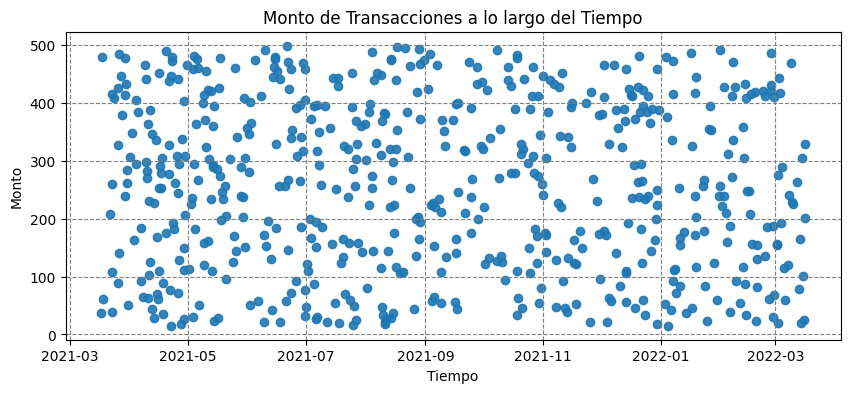

In [6]:
df['transactions']['timestamp'] = pd.to_datetime(df['transactions']['timestamp'])

plt.figure(figsize=(10, 4))
plt.scatter(df['transactions']['timestamp'], df['transactions']['amount'], alpha=0.9)
plt.title('Monto de Transacciones a lo largo del Tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Monto')
plt.grid(True)
plt.grid(linestyle = "dashed", color = "grey")
plt.show()

No veo un patrón claro de tendencia a lo largo del tiempo. En este caso se han realizado transacciones por todos los montos durante todo el año. No se da el caso de encontrarse todas cercanas a una fecha como podría tratarse del día de la madre / padre / navidades.

### Exercici 3: 
Una variable categòrica.

En este ejercicio he tomado la variable country de la tabla user. Creo que es un dato relevante para saber cúal es el mayor mercado. Un gráfico treemap será una buena representación para ver de forma clara qué peso tienen los diferentes países en la distribución.

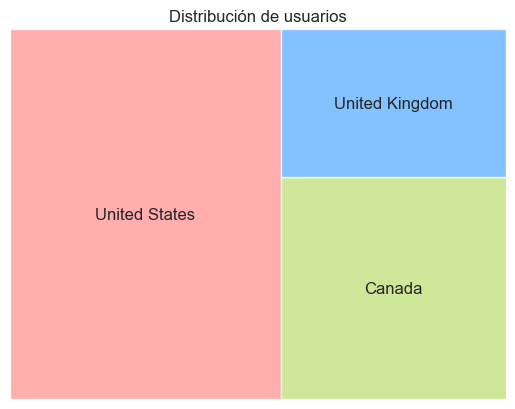

In [11]:
country_counts = df['user']['country'].value_counts()
colors = ['#ff9999','#c4e17f','#66b3ff']
squarify.plot(sizes=country_counts.values, label=country_counts.index, alpha=0.8, color=colors[:len(country_counts)])
plt.title('Distribución de usuarios')
plt.axis('off')
plt.show()

Podemos ver que más de la mitad de los usuarios se encuentran en Estados Unidos, que el segundo mercado más fuerte es Canadá y que el Reino Unido participa con la menor proporción de los tres. En base a esto se puede tomar decisiones de márketing por ejemplo. Se pueden analizar las características de los usuarios del Reino Unido y aplicar estrategias para ampliar el mercado, o se puede decidir por ejemplo que se prioriza retener a los ususarios de Estados Unidos y en consecuencia se pueden aplicar políticas que apunten a ello (promociones, beneficios, etc).

### Exercici 4: 
Una variable categòrica i una numèrica.

En este caso he elegido las variables amount de la trabla transactions y country de la tabla companies con la finalidad de evaluar cuáles son los países que tienen mayor número de ventas.

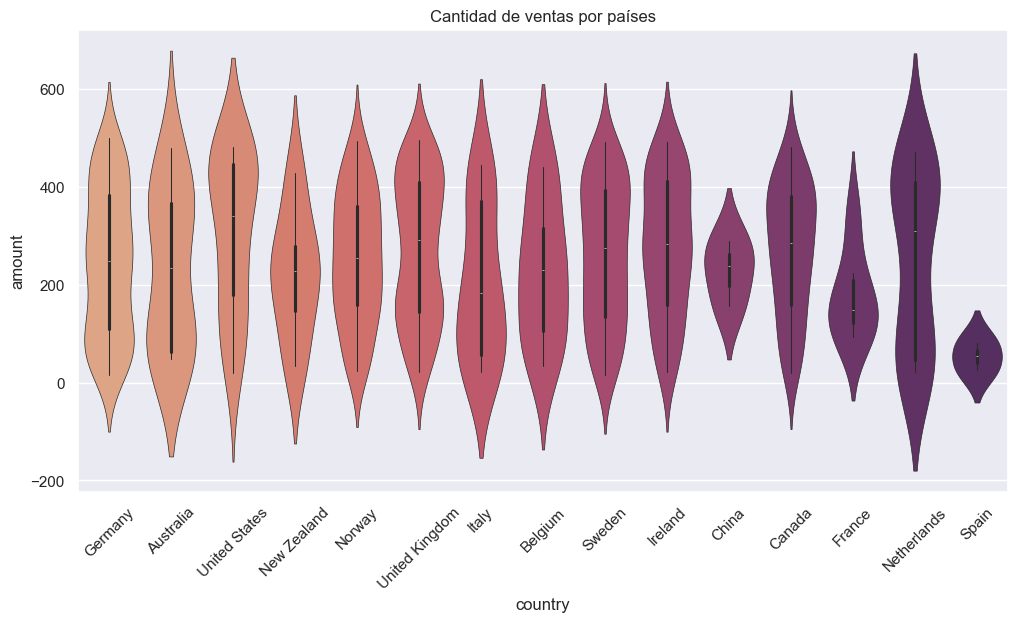

In [12]:
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid")
df_merged = pd.merge(df["companies"], df["transactions"], left_on='company_id', right_on='business_id')
violin = sns.violinplot(x=df_merged["country"], y=df_merged["amount"], linewidth=0.5, palette='flare', hue=df_merged["country"], legend=False)
plt.title('Cantidad de ventas por países')
plt.xticks(rotation=45)
plt.show()


Observando este gráfico podemos ver que en Estados Unidos y Netherlands se encuentran nuestros principales vendedores.


### Exercici 5: 
Dues variables categòriques.

En esta oportunidad he preferido volver a considerar la variable country de la tabla user y comprobar cómo se encuentran distribuidos los usuarios entre las diferentes ciudades. Puede que en Estados Unidos (que vimos en el ejercicio anterior era donde se encontraba la mayor cantidad de usuarios) se encuentren todos en unas pocas ciudades, así como también puede ocurrir que en el Reino Unido (que es el país con menor cantidad de usuarios) estén atomizados por todo el país. Los productos serían más conocidos en ese país entonces las estrategias pueden apuntar a consolidar las ventas haciendo multiplicar usuarios. Veremos qué arroja el gráfico.   
Por ese mismo motivo he seleccionado el mismo gráfico que en el ejercio 3. Para poder analizar lo que ocurre.  
En este caso usaré plotly para poder verlo mejor.

In [9]:
df_counts = df['user'].groupby(['country', 'city']).size().reset_index(name='count')
fig = px.treemap(df_counts, path=['country', 'city'], values='count')
fig.show()

Finalmemte puedo decir que este gráfico no me sirve para analizar con la profundidad que esperaba. Puedo decir que en el Reino Unido por ejemplo (exceptuando la localidad de March que cuenta con tres usuarios) encontramos un único usuario en cada localidad. Nos es valiosa esa información? Depende. Si pensamos que nuestros productos son conocidos a lo largo de los paises que lo conforman, podemos pensar que tenemos potenciales agentes de márketing en cada ciudad (usuarios). Por ejemplo: podríamos incentivar a nuestros usuarios ofreciéndoles un descuento en la próxima compra si traen un amigo que realice compras. Así multiplicaríamos usuarios rápidamente a un bajo costo de inversión. Pensando que tenemos usuarios en 50 ciuades de las 76 que componen el país, podríamos crecer en ventas rápidamente.  
Por lo que he averiguado en Estados Unidos hay más de 19000 ciudades y contamos con usuarios únicamente en 150 de ellas. A pesar de ser nuestro mercado más grande, se encuentra más concentrado (algunas ciudades cuentan con 6 usuarios). Con respecto a este ejemplo, podríamos tal vez pensar otro tipo de estrategia para la captación de nuevos clientes, tal vez realizando acciones de publicidad gráfica en aquellas ciudades donde aún no hemos llegado.  
Sería interesante ver cuánto han gastado cada uno de los países. Porque también puede haber muchos usuarios con transacciones de poco monto y tal vez no sea eso lo que nos interesa como empresa. Tal vez convenga buscar usuarios que gasten montos elevados y enfocar estrategias en ellos.


### Exercici 6: 
Tres variables.


**Variables Seleccionadas:** `amount`, `estado_tarjeta` y `timestamp` de la tabla `transactions` y `estado_tarj`.

**Justificación:** Combinar estas tres variables puede proporcionar una visión completa del comportamiento transaccional en función del tiempo y el estado de la tarjeta.

**Tipo de Gráfico:** Gráfico de burbujas.

**Interpretación:** El gráfico de burbujas mostrará el monto de las transacciones en función del tiempo y el estado de la tarjeta, permitiendo observar cómo estas variables interaccionan entre sí.


In [13]:
df_merged = pd.merge(df_transactions, df_estado_tarj, left_on='card_id', right_on='card_id')
df_merged['timestamp'] = pd.to_datetime(df_merged['timestamp'])

plt.figure(figsize=(14, 7))
plt.scatter(df_merged['timestamp'], df_merged['amount'], s=df_merged['amount'], c=df_merged['estado_tarjeta'].astype('category').cat.codes, alpha=0.6, cmap='viridis')
plt.colorbar()
plt.title('Monto de Transacciones a lo largo del Tiempo por Estado de Tarjeta')
plt.xlabel('Tiempo')
plt.ylabel('Monto de la Transacción')
plt.grid(True)
plt.show()

NameError: name 'df_transactions' is not defined


### Exercici 7: 
Graficar un Pairplot.


**Variables Seleccionadas:** `amount`, `lat`, `longitude`, `timestamp` de la tabla `transactions`.

**Justificación:** Estas variables proporcionan un conjunto completo de datos numéricos y temporales, permitiendo una exploración completa de las relaciones entre estas variables.

**Tipo de Gráfico:** Pairplot (gráfico de pares).

**Interpretación:** El pairplot mostrará todas las relaciones posibles entre estas variables numéricas, ayudando a identificar correlaciones y patrones entre las variables transaccionales.

Estas elecciones de variables y gráficos permitirán una exploración detallada y variada de los datos disponibles en tu modelo MySQL, proporcionando insights valiosos sobre diferentes aspectos de las transacciones y los usuarios.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_transactions['timestamp'] = pd.to_datetime(df_transactions['timestamp'])
df_transactions['timestamp'] = df_transactions['timestamp'].astype('int64') // 10**9  # Convertir timestamp a segundos

sns.pairplot(df_transactions[['amount', 'lat', 'longitude', 'timestamp']])
plt.suptitle('Pairplot de Variables Transaccionales', y=1.02)
plt.show()